In [ ]:
from tqdm import tqdm
import numpy as np
import random
import os
import json
import torch
from env import NLOpinionDynamics
from agents.dqn import DQN
from visualization import *

In [3]:
run_name = "global-simple-n25-hd128-layers4-lr5e-07-heads0-bs128-g0-par4-e0.6-tuf2000-BRAYL"

run_dir = os.path.join("saved files", "dqn", "nonlinear", "saved_runs", run_name)

# Load parameters
with open(os.path.join(run_dir, "params.json"), "r") as f:
    params = json.load(f)

params["wandb_init"] = False
# Initialize environment and agent
env = NLOpinionDynamics(**params)
agent = DQN(env=env, **params)

# Load model weights
q_net_path = os.path.join(run_dir, "q_network_params.pth")
target_net_path = os.path.join(run_dir, "target_network_params.pth")

agent.q_network.load_state_dict(torch.load(q_net_path, map_location=torch.device("cpu")))
agent.target_network.load_state_dict(torch.load(target_net_path, map_location=torch.device("cpu")))



<All keys matched successfully>

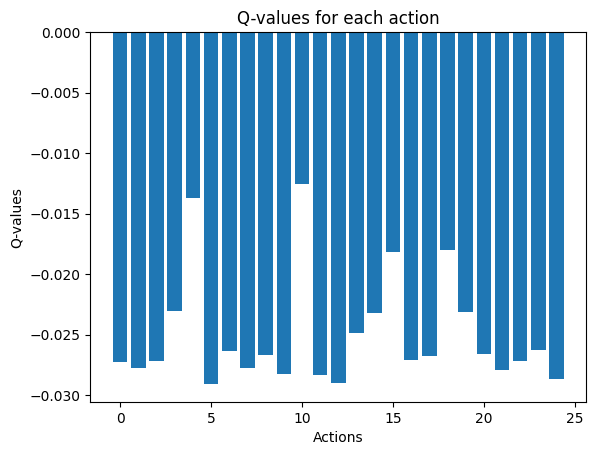

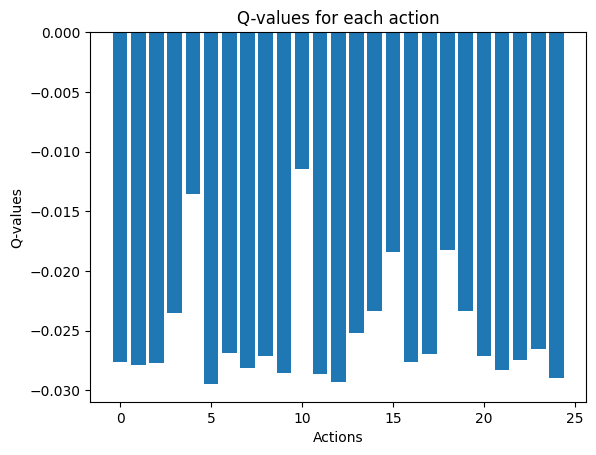

10
no edge
10


In [8]:
import matplotlib.pyplot as plt


state = env.reset()
# recorded_opinions_simulation = [state["sigma"].copy()]
for time_step in range(1, 3):
    action, q_values = agent.policy_greedy(state)
    plt.bar(range(len(q_values)), q_values.detach().numpy())
    plt.xlabel('Actions')
    plt.ylabel('Q-values')
    plt.title('Q-values for each action')
    plt.show()
    next_state, _, _ = env.step(action)
    tau = state["tau"]
    if tau is not None:
        print(tau)
        if state["graph"].has_edge(tau, action):
            print("edge")
        else:
            print("no edge")
        print(action)
    state = next_state

In [ ]:
state = env.reset()

